<h1> Housing Prices in California</h1>

Import dataset

In [1]:
dataset <- read.csv("housing.csv")

Check the dataset

In [2]:
head(dataset)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
2,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
3,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
4,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
5,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
6,-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY


In [3]:
summary(dataset)

   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.: 1448  
 Median :-118.5   Median :34.26   Median :29.00      Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.64      Mean   : 2636  
 3rd Qu.:-118.0   3rd Qu.:37.71   3rd Qu.:37.00      3rd Qu.: 3148  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :39320  
                                                                    
 total_bedrooms     population      households     median_income    
 Min.   :   1.0   Min.   :    3   Min.   :   1.0   Min.   : 0.4999  
 1st Qu.: 296.0   1st Qu.:  787   1st Qu.: 280.0   1st Qu.: 2.5634  
 Median : 435.0   Median : 1166   Median : 409.0   Median : 3.5348  
 Mean   : 537.9   Mean   : 1425   Mean   : 499.5   Mean   : 3.8707  
 3rd Qu.: 647.0   3rd Qu.: 1725   3rd Qu.: 605.0   3rd Qu.: 4.7432  
 Max.   :6445.0   Max.   :35682   

<h1> Data preprocessing</h1>

<h3>Missing value treatments </h3>

Warning message:
"package 'Amelia' was built under R version 4.1.3"
Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.0, built: 2021-05-26)
## Copyright (C) 2005-2022 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



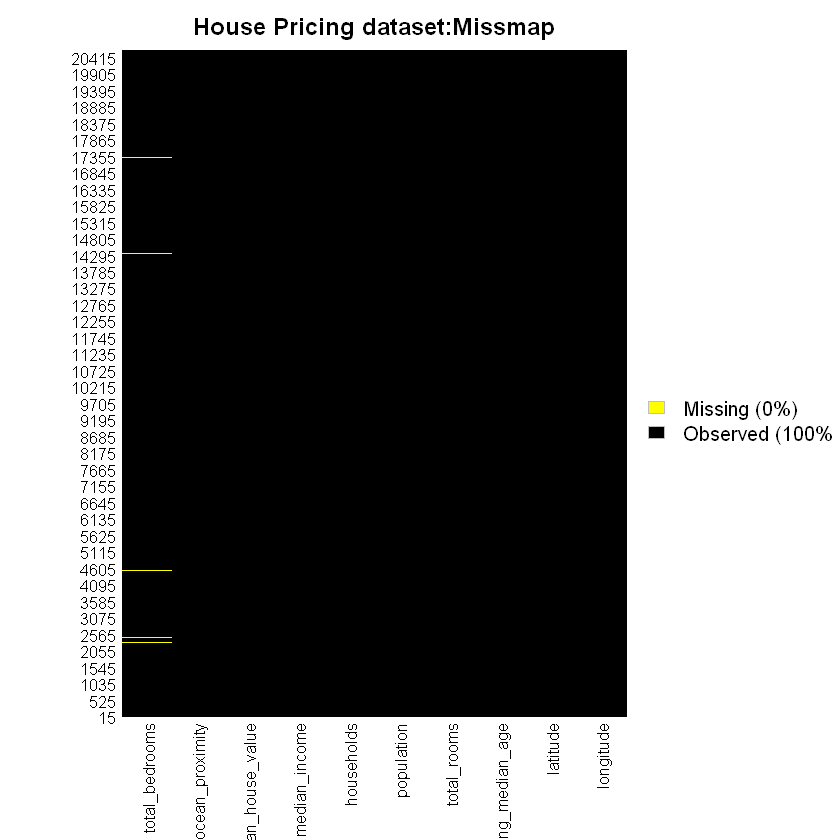

In [4]:
library(Amelia)
missmap(dataset,col=c("yellow","black"),main="House Pricing dataset:Missmap")

Here **total_bedrooms** variable contains missing values.Now find how many missing values contain the total_bedrooms variable and check the distrbution of total_bedrooms variable

In [5]:
summary(dataset$total_bedrooms)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    1.0   296.0   435.0   537.9   647.0  6445.0     207 

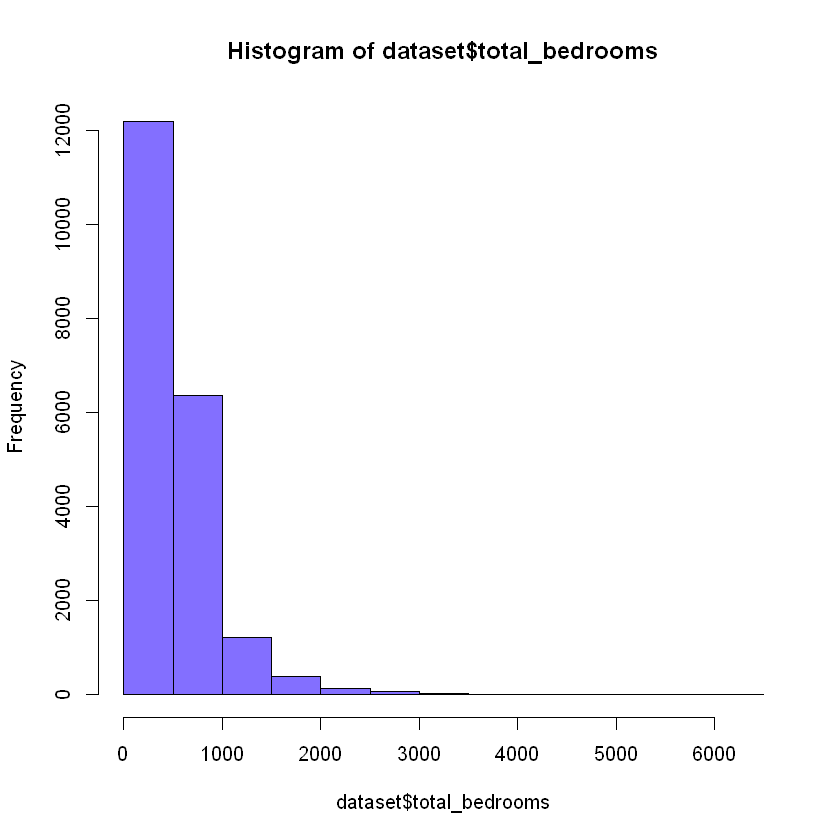

In [6]:
hist(dataset$total_bedrooms,col="slateblue1")

There are **207** missing values and data is positively skewed.So we may replace missing values with **median**.

In [7]:
dataset$total_bedrooms <- ifelse(is.na(dataset$total_bedrooms),
                                median(dataset$total_bedrooms,na.rm=T),
                                dataset$total_bedrooms)

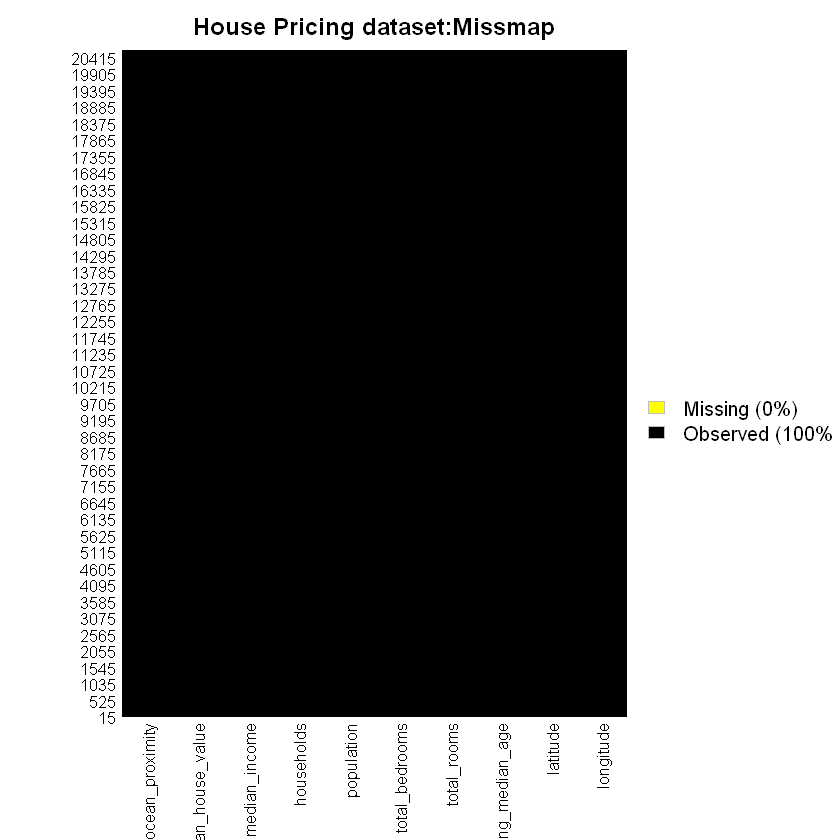

In [8]:
missmap(dataset,col=c("yellow","black"),main="House Pricing dataset:Missmap")

Now there is no missing values in the dataset 

<h3>Categorical Data</h3>

In [9]:
table(dataset$ocean_proximity)


 <1H OCEAN     INLAND     ISLAND   NEAR BAY NEAR OCEAN 
      9136       6551          5       2290       2658 

Make dummy variables 

In [10]:
cat_data <- data.frame(ocean_proximity= dataset$ocean_proximity)
cat_data$one_H_OCEAN <- ifelse(dataset$ocean_proximity=="<1H OCEAN",1,0)
cat_data$INLAND <-ifelse(dataset$ocean_proximity=="INLAND",1,0)
cat_data$NEAR_BAY <-ifelse(dataset$ocean_proximity=="NEAR BAY",1,0)
cat_data$NEAR_OCEAN <-ifelse(dataset$ocean_proximity=="NEAR OCEAN",1,0)
cat_data$ISLAND <- ifelse(dataset$ocean_proximity=="ISLAND",1,0)

<h1>  Exploratory Data Analysis </h1>

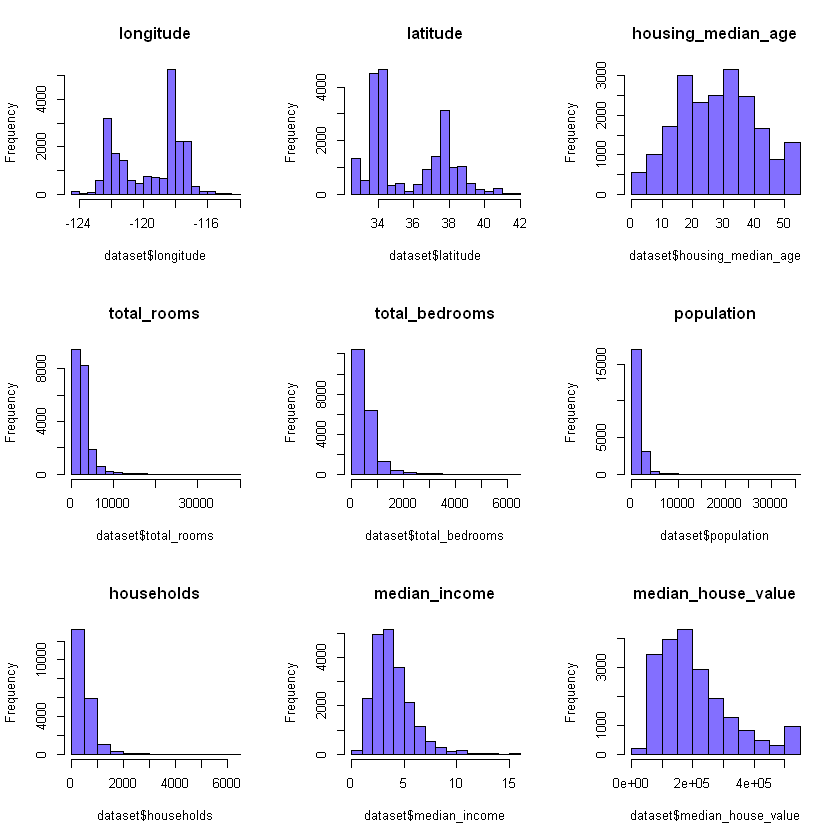

In [11]:
par(mfrow = c(3, 3))
hist(dataset$longitude, main = "longitude", col="slateblue1")
hist(dataset$latitude, main = "latitude", col="slateblue1")
hist(dataset$housing_median_age, main = "housing_median_age", col="slateblue1")
hist(dataset$total_rooms, main = "total_rooms", col="slateblue1")
hist(dataset$total_bedrooms, main = "total_bedrooms", col="slateblue1")
hist(dataset$population, main = "population", col="slateblue1")
hist(dataset$households, main = "households", col="slateblue1")
hist(dataset$median_income, main = "median_income", col="slateblue1")
hist(dataset$median_house_value, main = "median_house_value", col="slateblue1")

Correlation Matrix

In [12]:
corr_matrix <- round(cor(dataset[,1:9], ), digits = 2)
corr_matrix 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.00,-0.92,-0.11,0.04,0.07,0.10,0.06,-0.02,-0.05
latitude,-0.92,1.00,0.01,-0.04,-0.07,-0.11,-0.07,-0.08,-0.14
housing_median_age,-0.11,0.01,1.00,-0.36,-0.32,-0.30,-0.30,-0.12,0.11
total_rooms,0.04,-0.04,-0.36,1.00,0.93,0.86,0.92,0.20,0.13
total_bedrooms,0.07,-0.07,-0.32,0.93,1.00,0.87,0.97,-0.01,0.05
population,0.10,-0.11,-0.30,0.86,0.87,1.00,0.91,0.00,-0.02
households,0.06,-0.07,-0.30,0.92,0.97,0.91,1.00,0.01,0.07
median_income,-0.02,-0.08,-0.12,0.20,-0.01,0.00,0.01,1.00,0.69
median_house_value,-0.05,-0.14,0.11,0.13,0.05,-0.02,0.07,0.69,1.00


Scatter plots for variables

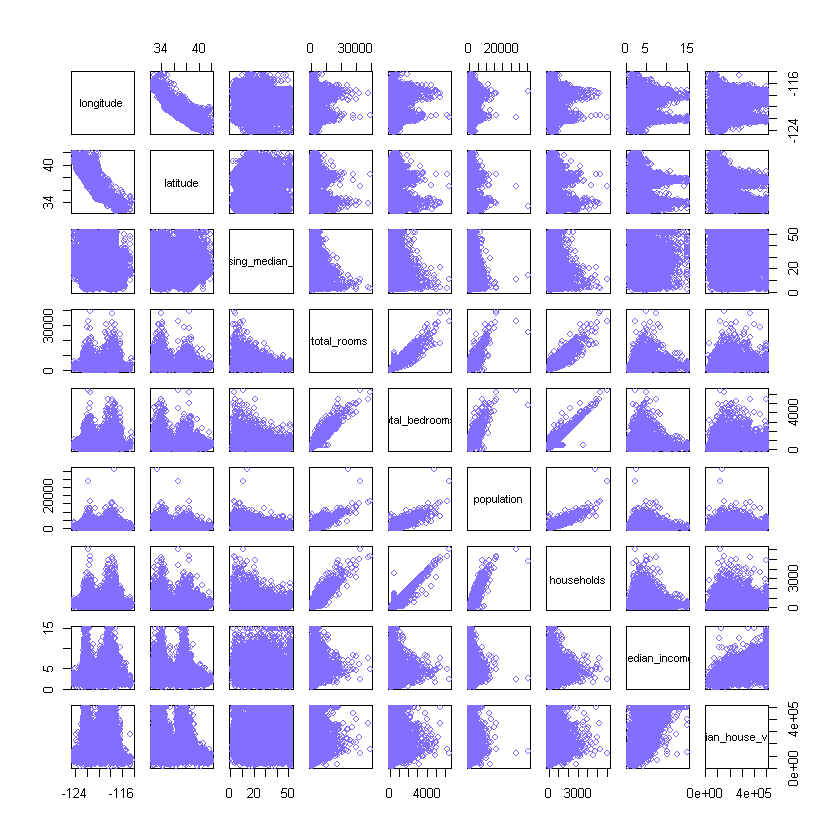

In [13]:
par(mfrow = c(1, 1))
pairs(dataset[,1:9], col = "slateblue1")

There is high correlation between “households” and “total_bedrooms”, as well as “households” and “total_rooms”.

<h1> Feature engineering </h1>

In [14]:
dataset$mean_bedrooms = dataset$total_bedrooms/dataset$households
dataset$mean_rooms = dataset$total_rooms/dataset$households

drops = c('total_bedrooms', 'total_rooms')

dataset = dataset[ , !(names(dataset) %in% drops)]

Again check the Correlation Matrix

In [15]:
corr_matrix <- round(cor(dataset[,-8], ), digits = 2)
corr_matrix 

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,mean_bedrooms,mean_rooms
longitude,1.00,-0.92,-0.11,0.10,0.06,-0.02,-0.05,0.01,-0.03
latitude,-0.92,1.00,0.01,-0.11,-0.07,-0.08,-0.14,0.07,0.11
housing_median_age,-0.11,0.01,1.00,-0.30,-0.30,-0.12,0.11,-0.06,-0.15
population,0.10,-0.11,-0.30,1.00,0.91,0.00,-0.02,-0.08,-0.07
households,0.06,-0.07,-0.30,0.91,1.00,0.01,0.07,-0.07,-0.08
median_income,-0.02,-0.08,-0.12,0.00,0.01,1.00,0.69,-0.05,0.33
median_house_value,-0.05,-0.14,0.11,-0.02,0.07,0.69,1.00,-0.05,0.15
mean_bedrooms,0.01,0.07,-0.06,-0.08,-0.07,-0.05,-0.05,1.00,0.78
mean_rooms,-0.03,0.11,-0.15,-0.07,-0.08,0.33,0.15,0.78,1.00


<h3>Feature Scaling</h3>

In [16]:
num_data <- dataset[,-(7:8)]
head(num_data)

,longitude,latitude,housing_median_age,population,households,median_income,mean_bedrooms,mean_rooms
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-122.23,37.88,41,322,126,8.3252,1.0238095,6.984127
2,-122.22,37.86,21,2401,1138,8.3014,0.9718805,6.238137
3,-122.24,37.85,52,496,177,7.2574,1.0734463,8.288136
4,-122.25,37.85,52,558,219,5.6431,1.0730594,5.817352
5,-122.25,37.85,52,565,259,3.8462,1.0810811,6.281853
6,-122.25,37.85,52,413,193,4.0368,1.1036269,4.761658


In [17]:
num_data <- scale(num_data)
head(num_data)

longitude,latitude,housing_median_age,population,households,median_income,mean_bedrooms,mean_rooms
-1.327803,1.052523,0.9821189,-0.9744050,-0.9770092,2.34470896,-0.148510661,0.6285442
-1.322812,1.043159,-0.6070042,0.8614180,1.6699206,2.33218146,-0.248535936,0.3270334
-1.332794,1.038478,1.8561366,-0.8207575,-0.8436165,1.78265622,-0.052900657,1.1555925
-1.337785,1.038478,1.8561366,-0.7660095,-0.7337637,0.93294491,-0.053646030,0.1569623
-1.337785,1.038478,1.8561366,-0.7598283,-0.6291419,-0.01288068,-0.038194658,0.3447024
-1.337785,1.038478,1.8561366,-0.8940491,-0.8017678,0.08744452,0.005232996,-0.2697231


<h3>Marge dataset </h3>

In [18]:
clean_data <-cbind(num_data,cat_data[,-1],median_house_value=dataset$median_house_value)
head(clean_data)

,longitude,latitude,housing_median_age,population,households,median_income,mean_bedrooms,mean_rooms,one_H_OCEAN,INLAND,NEAR_BAY,NEAR_OCEAN,ISLAND,median_house_value
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.327803,1.052523,0.9821189,-0.9744050,-0.9770092,2.34470896,-0.148510661,0.6285442,0,0,1,0,0,452600
2,-1.322812,1.043159,-0.6070042,0.8614180,1.6699206,2.33218146,-0.248535936,0.3270334,0,0,1,0,0,358500
3,-1.332794,1.038478,1.8561366,-0.8207575,-0.8436165,1.78265622,-0.052900657,1.1555925,0,0,1,0,0,352100
4,-1.337785,1.038478,1.8561366,-0.7660095,-0.7337637,0.93294491,-0.053646030,0.1569623,0,0,1,0,0,341300
5,-1.337785,1.038478,1.8561366,-0.7598283,-0.6291419,-0.01288068,-0.038194658,0.3447024,0,0,1,0,0,342200
6,-1.337785,1.038478,1.8561366,-0.8940491,-0.8017678,0.08744452,0.005232996,-0.2697231,0,0,1,0,0,269700


<h3>Split the dataset into training and test set</h3> 

In [19]:
library(caTools)
set.seed(123)
Split <- sample.split(Y = clean_data$median_house_value,SplitRatio = 0.95)
training_set <- subset(clean_data,Split==T)
test_set <- subset(clean_data,Split==F)

Warning message:
"package 'caTools' was built under R version 4.1.3"


In [20]:
head(training_set)

,longitude,latitude,housing_median_age,population,households,median_income,mean_bedrooms,mean_rooms,one_H_OCEAN,INLAND,NEAR_BAY,NEAR_OCEAN,ISLAND,median_house_value
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.327803,1.052523,0.9821189,-0.9744050,-0.9770092,2.34470896,-0.148510661,0.6285442,0,0,1,0,0,452600
2,-1.322812,1.043159,-0.6070042,0.8614180,1.6699206,2.33218146,-0.248535936,0.3270334,0,0,1,0,0,358500
3,-1.332794,1.038478,1.8561366,-0.8207575,-0.8436165,1.78265622,-0.052900657,1.1555925,0,0,1,0,0,352100
4,-1.337785,1.038478,1.8561366,-0.7660095,-0.7337637,0.93294491,-0.053646030,0.1569623,0,0,1,0,0,341300
5,-1.337785,1.038478,1.8561366,-0.7598283,-0.6291419,-0.01288068,-0.038194658,0.3447024,0,0,1,0,0,342200
6,-1.337785,1.038478,1.8561366,-0.8940491,-0.8017678,0.08744452,0.005232996,-0.2697231,0,0,1,0,0,269700


In [21]:
head(test_set)

,longitude,latitude,housing_median_age,population,households,median_income,mean_bedrooms,mean_rooms,one_H_OCEAN,INLAND,NEAR_BAY,NEAR_OCEAN,ISLAND,median_house_value
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17,-1.347768,1.038478,1.85613656,-0.55849704,-0.4408228,-0.57672306,-0.10126340,0.2063628,0,0,1,0,0,152500
48,-1.347768,1.024432,1.14103117,-0.76600950,-0.6448352,-1.12424812,0.25481860,-0.5855542,0,0,1,0,0,137500
53,-1.347768,1.024432,0.98211887,0.47111797,0.5766235,-1.45270000,0.16143806,-0.3861446,0,0,1,0,0,97500
88,-1.347768,1.019751,-1.48102190,-0.77660588,-0.4434384,-1.63734890,-0.08930736,-1.1225910,0,0,1,0,0,162500
94,-1.347768,1.010387,-0.13026729,-0.62472442,-0.5166736,-0.65020364,0.09264296,-0.7823310,0,0,1,0,0,187500
110,-1.337785,1.024432,-0.05081113,0.08346704,0.7910980,0.01875386,-0.06708039,-0.5125558,0,0,1,0,0,225000


<h1>Create Model </h1>

In [ ]:
library(randomForest)

rf_model <- randomForest(x = training_set[, names(training_set) !='median_house_value'],
                         y = training_set$median_house_value,importance =T)

In [ ]:
print(rf_model)

In [ ]:
#install.packages("caret")
library(caret)
